## Observations and Insights 

3 Observations and/or inferences:

1) Over all other drug regimen tested in the project, Capomulin and Ramicane performed far superior to any of the other treatments, with the lowest average tumor volume by the end of the 45 days.  However, the data would be better served for a more accurate result if the data used was the percentage change in tumor volume from the beginning to the last day of the project.

2) The experiments were fairly equal when it comes to the sexes, with almost equal numbers of males and females in the tests.  However, a better check would be to determine how effective each drug regimen affected each sex.  The results will then show if any particular drug is more effective for a particular sex over another, or if the drugs are equally effective for both sexes.

3) For the drug Capomulin, as expected, there is a very positive correlation between the weight and the average volume of the tumors, with a correlation coefficient of 0.8419.  However, due to the fact that there is such a positive correlation between tumor size and mice weight, if the drug regimen being tested had smaller mice overall, then their results will have a lower average tumor volume overall.  This further emphasizes that using average tumor size alone is not a good indicator for how effective the drugs are, and that taking the percentage change in tumor volume will yield more accurate results.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how = "left", on= ["Mouse ID"])
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
mouse_number = len(mouse_study["Mouse ID"].unique())
print(f'There are {mouse_number} mice in the study.')

There are 249 mice in the study.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = mouse_study[mouse_study.duplicated(['Mouse ID'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study.sort_values(['Mouse ID', 'Timepoint'],ascending= True)
mouse_clean = mouse_study.drop_duplicates(subset='Mouse ID', keep='last')
mouse_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_number_new = mouse_clean['Mouse ID'].count()
print(f'There are now {mouse_number_new} mice in the new dataset.')

There are now 249 mice in the new dataset.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen = mouse_clean.groupby(['Drug Regimen'])
tumor_avg = regimen['Tumor Volume (mm3)'].mean()
tumor_med = regimen['Tumor Volume (mm3)'].median()
tumor_var = regimen['Tumor Volume (mm3)'].var()
tumor_std = regimen['Tumor Volume (mm3)'].std()
tumor_sem = regimen['Tumor Volume (mm3)'].sem()

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
general_sum = pd.DataFrame({'Mean': tumor_avg,
                            'Median': tumor_med,
                            'Variance': tumor_var,
                            'Standard Deviation': tumor_std,
                            'SEM': tumor_sem})
general_sum.style.format('{:,.3f}')

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.668,38.125,32.663,5.715,1.143
Ceftamin,57.754,59.852,69.983,8.366,1.673
Infubinol,58.178,60.165,74.011,8.603,1.721
Ketapril,62.806,64.488,98.921,9.946,1.989
Naftisol,61.206,63.283,106.030,10.297,2.059
Placebo,60.508,62.031,78.760,8.875,1.775
Propriva,56.737,55.841,69.349,8.328,1.666
Ramicane,36.191,36.562,32.166,5.672,1.134
Stelasyn,61.002,62.192,90.332,9.504,1.940


## Bar Plots

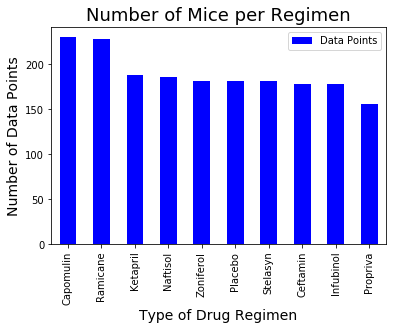

In [75]:
# Generate a bar plot showing the number of mice per regimen for each treatment throughout the course of the study using pandas.

#Re-doing the data set to include more data similar to examples given on Slack
mouse_clean_whole = mouse_study.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')

regimen_whole = mouse_clean_whole.groupby(['Drug Regimen'])
regimen_unique = regimen_whole['Drug Regimen'].unique().str[0]
mouse_clean_count = regimen_whole['Mouse ID'].count()

general_new = pd.DataFrame({'Drug Regimen': regimen_unique,
                            'Data Points': mouse_clean_count})

#Sort data by descending order of Data Points
bar_sort = general_new.sort_values('Data Points', ascending = False)
regimen_bar = bar_sort["Drug Regimen"]
data_bar = bar_sort['Data Points']

#Creating the bar graph based on Pandas
bar_panda = bar_sort.plot.bar('Drug Regimen', 'Data Points', align='center', color='blue')
bar_panda.set_title('Number of Mice per Regimen', fontsize=18)
bar_panda.set_ylabel('Number of Data Points', fontsize=14)
bar_panda.set_xlabel('Type of Drug Regimen', fontsize=14)
bar_panda

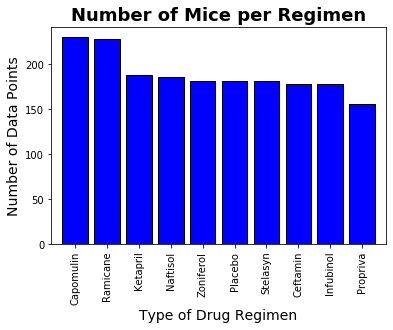

In [76]:
# Generate a bar plot showing the number of mice per regimen for each treatment throughout the course of the study using pyplot.
plt.bar(regimen_bar, data_bar, align='center', edgecolor ='k', color='blue')
plt.title('Number of Mice per Regimen', fontsize=18, fontweight='bold')
plt.xlabel('Type of Drug Regimen', fontsize=14)
plt.ylabel('Number of Data Points', fontsize=14)
plt.xlim(-0.75, len(regimen_bar)-0.25)
plt.xticks(rotation=90)
plt.show()

## Pie Plots

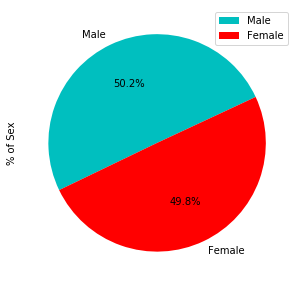

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = mouse_clean.groupby(['Sex'])
sex_unique = sex_group['Sex'].unique().str[0]
sex_count = sex_group['Mouse ID'].count()

sex_df = pd.DataFrame({'Sex': sex_unique,
                       '% of Sex': sex_count})

pie_sort = sex_df.sort_values('% of Sex', ascending = False)
pie_sex = pie_sort['Sex']
pie_count = pie_sort['% of Sex']

pie_pandas = pie_sort.plot.pie(y='% of Sex', figsize=(5, 5), autopct='%1.1f%%', colors = ('c', 'r'), startangle = 25)
pie_pandas

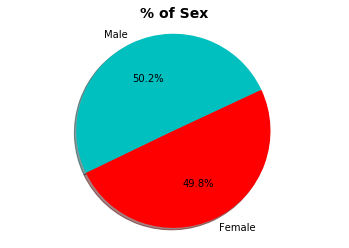

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_count, labels=pie_sex, colors=('c', 'r'), autopct='%1.1f%%', shadow=True, startangle = 25)
plt.axis('equal')
plt.title('% of Sex', fontsize = 14, fontweight = 'bold')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
#Get data for only the drug regimen listed from data set that has only the last Timepoint for each mouse
new_mouse_list = mouse_clean[mouse_clean['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
volume_df = pd.DataFrame({'Drug Regimen': new_mouse_list['Drug Regimen'],
                          'Mouse ID': new_mouse_list['Mouse ID'],
                          'Tumor Volume': new_mouse_list['Tumor Volume (mm3)']})
volume_df.reset_index(drop = True)

,Drug Regimen,Mouse ID,Tumor Volume
0,Ramicane,k403,22.050126
1,Capomulin,s185,23.343598
2,Capomulin,x401,28.484033
3,Capomulin,m601,28.430964
4,Ramicane,g791,29.128472
...,...,...,...
95,Ceftamin,x822,61.386660
96,Infubinol,y163,67.685569
97,Ceftamin,y769,68.594745
98,Ceftamin,y865,64.729837


In [16]:
# Calculate the quartiles and IQR

#Calculate the quartiles
final_volume = volume_df['Tumor Volume']
quartiles = final_volume.quantile([.25,.5,.75])

#Calculate the IQR
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

stats_df = pd.DataFrame({'Statistics': ['Median Quartile', 
                                        'Lower Quartile', 
                                        'Upper Quartile', 
                                        'Interquartile Range (IQR)', 
                                        'Lower Bound', 
                                        'Upper Bound'],
                        'Values': [quartiles[0.5], lowerq, upperq, iqr, lower_bound, upper_bound]})

stats_df.style.hide_index()

Statistics,Values
Median Quartile,45
Lower Quartile,37.1877
Upper Quartile,59.9303
Interquartile Range (IQR),22.7425
Lower Bound,3.07397
Upper Bound,94.044


In [17]:
# Quantitatively determine if there are any potential outliers

upper_value = volume_df['Tumor Volume'].max()
lower_value = volume_df['Tumor Volume'].min()

if upper_value > upper_bound or lower_value < lower_bound:
    print(f'The largest volume is {upper_value}, with an Upper Bound of {upper_bound}, and the smallest volume is\
 {lower_value}, with a Lower Bound of {lower_bound}.  Therefore, there are outliers.')
elif upper_value <= upper_bound and lower_value >= lower_bound:
    print(f'The largest volume is {upper_value}, with an Upper Bound of {upper_bound}, and the smallest volume is\
 {lower_value}, with a Lower Bound of {lower_bound}. Therefore, there are no outliers.')

The largest volume is 72.2267309, with an Upper Bound of 94.04403868375002, and the smallest volume is 22.05012627, with a Lower Bound of 3.0739668737499812. Therefore, there are no outliers.


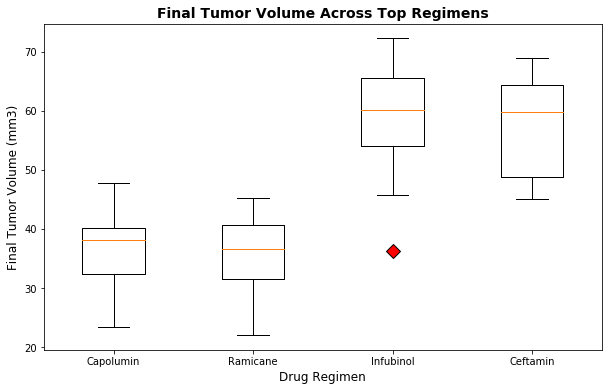

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# List for each regimen
capomulin_list = volume_df[volume_df['Drug Regimen'].isin(['Capomulin'])]
ramicane_list = volume_df[volume_df['Drug Regimen'].isin(['Ramicane'])]
infubinol_list = volume_df[volume_df['Drug Regimen'].isin(['Infubinol'])]
ceftamin_list = volume_df[volume_df['Drug Regimen'].isin(['Ceftamin'])]

# Pandas plot method of boxplot, which looked prettier
#box_df = pd.DataFrame({'Capomulin': capomulin_list['Tumor Volume'],
#                       'Ramicane': ramicane_list['Tumor Volume'],
#                       'Infubinol': infubinol_list['Tumor Volume'],
#                       'Ceftamin': ceftamin_list['Tumor Volume']})

#box_plot = box_df.boxplot(column=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

#box_plot.set_title('Final Tumor Volume Across Top Regimens', fontsize=14, fontweight='bold')
#box_plot.set_ylabel('Final Tumor Volume (mm3)', fontsize=12)
#box_plot.set_xlabel('Drug Regimen', fontsize=12)
#box_plot.grid(False)

# MatPlotLib method of box plot
data = [capomulin_list['Tumor Volume'], 
        ramicane_list['Tumor Volume'], 
        infubinol_list['Tumor Volume'], 
        ceftamin_list['Tumor Volume']]

top_regimen = ['Capolumin', 'Ramicane', 'Infubinol', 'Ceftamin']
fig1, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Final Tumor Volume Across Top Regimens', fontsize=14, fontweight='bold')
ax.set_ylabel('Final Tumor Volume (mm3)', fontsize=12)
ax.set_xlabel('Drug Regimen', fontsize=12)
ax.set_xticklabels(np.repeat(top_regimen,1))

# Highlight any potential outliers in the plot by changing their color and style.
red_diamond = dict(markerfacecolor='r', marker='D', markersize=10)
ax.boxplot(data, flierprops=red_diamond)

plt.show()


## Line and Scatter Plots

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Pull in data for Capomulin
capomulin_list_only = mouse_clean_whole[mouse_clean_whole['Drug Regimen'].isin(['Capomulin'])]
#Identify Mouse ID to pick from
capomulin_list_only['Mouse ID'].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

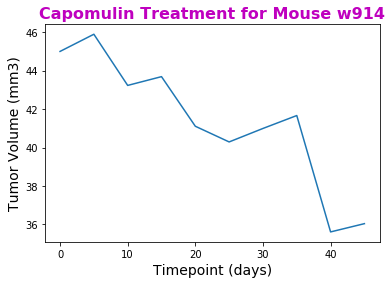

In [43]:
# Picking 'w914' as sample mouse
w914_list = mouse_clean_whole[mouse_clean_whole['Mouse ID'].isin(['w914'])]


plt.plot(w914_list['Timepoint'], w914_list['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)', fontsize=14)
plt.ylabel('Tumor Volume (mm3)', fontsize=14)
plt.title('Capomulin Treatment for Mouse w914', fontsize=16, fontweight= 'bold', color='m')
plt.show()

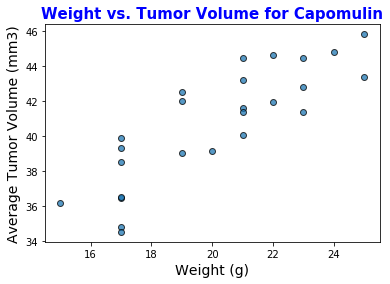

In [71]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_group = capomulin_list_only.groupby(['Mouse ID'])
capomulin_weight = capomulin_group['Weight (g)'].unique().str[0]
capomulin_avg_vol = capomulin_group['Tumor Volume (mm3)'].mean()

plt.scatter(capomulin_weight, capomulin_avg_vol, marker="o", edgecolors="black", alpha=0.75)
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)
plt.title('Weight vs. Tumor Volume for Capomulin', fontsize=15, fontweight= 'bold', color='b')
plt.show()

## Correlation and Regression

The correlation coefficient is "0.8419363424694718".  Therefore, there is a strong positive correlation in the data.
The linear regression is "y = 0.95x + 21.55".


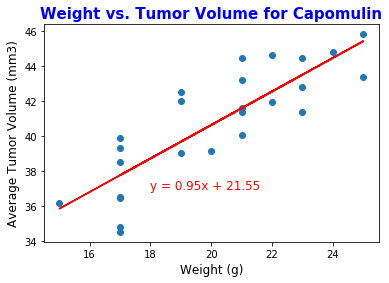

In [104]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_weight
y_values = capomulin_avg_vol

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (18, 37), fontsize=12, color="red")
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)
plt.title('Weight vs. Tumor Volume for Capomulin', fontsize=15, fontweight= 'bold', color='b')

# Display the correlation coefficient
print(f'The correlation coefficient is "{rvalue}".  Therefore, there is a strong positive correlation in the data.')
print(f'The linear regression is "{line_eq}".')
plt.show()